<a href="https://colab.research.google.com/github/sundeepmuddana/DEVCODEEDUR/blob/master/dynamic%20priceing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

locations = ['79936', '10001', '30301', '60601', '90001']
departments = ['Deli', 'Snacks', 'Beverages', 'Bakery', 'Frozen Foods']
categories = {
    'Deli': ['Hummus, Dips, & Salsa', 'Cheese', 'Prepared Meals'],
    'Snacks': ['Chips', 'Nuts & Seeds', 'Cookies'],
    'Beverages': ['Juice', 'Soda', 'Water'],
    'Bakery': ['Bread', 'Pastries', 'Cakes'],
    'Frozen Foods': ['Ice Cream', 'Frozen Meals', 'Frozen Vegetables']
}
products = {
    'Hummus, Dips, & Salsa': [
        {'name': 'Roasted Red Pepper Hummus', 'brand': 'Marketside', 'size': '10 Oz', 'price': 2.67},
        {'name': 'Garlic Hummus', 'brand': 'Marketside', 'size': '10 Oz', 'price': 2.67},
        {'name': 'Classic Hummus', 'brand': 'Marketside', 'size': '10 Oz', 'price': 2.67}
    ],
    'Cheese': [
        {'name': 'Cheddar Cheese', 'brand': 'Kraft', 'size': '8 Oz', 'price': 3.49},
        {'name': 'Mozzarella Cheese', 'brand': 'Sargento', 'size': '8 Oz', 'price': 3.49}
    ],
    'Prepared Meals': [
        {'name': 'Chicken Alfredo', 'brand': 'Stouffer\'s', 'size': '12 Oz', 'price': 4.99},
        {'name': 'Beef Stroganoff', 'brand': 'Stouffer\'s', 'size': '12 Oz', 'price': 4.99}
    ],
    'Chips': [
        {'name': 'Potato Chips', 'brand': 'Lay\'s', 'size': '8 Oz', 'price': 2.99},
        {'name': 'Tortilla Chips', 'brand': 'Tostitos', 'size': '10 Oz', 'price': 3.49}
    ],
    'Nuts & Seeds': [
        {'name': 'Almonds', 'brand': 'Blue Diamond', 'size': '6 Oz', 'price': 5.99},
        {'name': 'Sunflower Seeds', 'brand': 'David', 'size': '8 Oz', 'price': 3.49}
    ],
    'Cookies': [
        {'name': 'Chocolate Chip Cookies', 'brand': 'Chips Ahoy', 'size': '13 Oz', 'price': 4.29},
        {'name': 'Oatmeal Raisin Cookies', 'brand': 'Quaker', 'size': '12 Oz', 'price': 4.29}
    ],
    'Juice': [
        {'name': 'Orange Juice', 'brand': 'Tropicana', 'size': '64 Oz', 'price': 3.99},
        {'name': 'Apple Juice', 'brand': 'Mott\'s', 'size': '64 Oz', 'price': 3.49}
    ],
    'Soda': [
        {'name': 'Cola', 'brand': 'Coca-Cola', 'size': '2 L', 'price': 1.99},
        {'name': 'Lemon-Lime Soda', 'brand': 'Sprite', 'size': '2 L', 'price': 1.99}
    ],
    'Water': [
        {'name': 'Spring Water', 'brand': 'Poland Spring', 'size': '24 Pack', 'price': 4.99},
        {'name': 'Purified Water', 'brand': 'Nestle', 'size': '24 Pack', 'price': 4.99}
    ],
    'Bread': [
        {'name': 'Whole Wheat Bread', 'brand': 'Arnold', 'size': '20 Oz', 'price': 2.99},
        {'name': 'White Bread', 'brand': 'Wonder', 'size': '20 Oz', 'price': 2.49}
    ],
    'Pastries': [
        {'name': 'Danish Pastry', 'brand': 'Entenmann\'s', 'size': '12 Oz', 'price': 4.99},
        {'name': 'Cinnamon Rolls', 'brand': 'Pillsbury', 'size': '8 Oz', 'price': 3.49}
    ],
    'Cakes': [
        {'name': 'Chocolate Cake', 'brand': 'Betty Crocker', 'size': '15 Oz', 'price': 5.99},
        {'name': 'Vanilla Cake', 'brand': 'Duncan Hines', 'size': '15 Oz', 'price': 5.99}
    ],
    'Ice Cream': [
        {'name': 'Vanilla Ice Cream', 'brand': 'Haagen-Dazs', 'size': '14 Oz', 'price': 4.99},
        {'name': 'Chocolate Ice Cream', 'brand': 'Breyers', 'size': '48 Oz', 'price': 6.99}
    ],
    'Frozen Meals': [
        {'name': 'Frozen Pizza', 'brand': 'DiGiorno', 'size': '30 Oz', 'price': 6.99},
        {'name': 'Frozen Burritos', 'brand': 'El Monterey', 'size': '10 Pack', 'price': 7.49}
    ],
    'Frozen Vegetables': [
        {'name': 'Mixed Vegetables', 'brand': 'Birds Eye', 'size': '16 Oz', 'price': 2.49},
        {'name': 'Spinach', 'brand': 'Green Giant', 'size': '16 Oz', 'price': 2.49}
    ]
}

num_rows = 10000

rows = []
for i in range(num_rows):
    location = random.choice(locations)
    department = random.choice(departments)
    category = random.choice(categories[department])

    if category not in products:
        print(f"Category '{category}' not found in products dictionary.")
        continue

    product = random.choice(products[category])
    row = {
        'SHIPPING_LOCATION': location,
        'DEPARTMENT': department,
        'CATEGORY': category,
        'SUBCATEGORY': np.nan,
        'BREADCRUMBS': f'{department}/{category}',
        'SKU': random.randint(100000000, 999999999),
        'PRODUCT_URL': f'https://www.walmart.com/ip/{product["name"].replace(" ", "-")}',
        'PRODUCT_NAME': f'{product["brand"]} {product["name"]}, {product["size"]}',
        'BRAND': product['brand'],
        'PRICE_RETAIL': product['price'],
        'PRICE_CURRENT': product['price'],
        'PRODUCT_SIZE': product['size'].split(' ')[0],
        'PROMOTION': np.nan,
        'RunDate': (datetime(2022, 1, 1) + timedelta(days=random.randint(0, 365))).strftime('%Y-%m-%d %H:%M:%S')
    }
    rows.append(row)

df = pd.DataFrame(rows)


df['RunDate'] = pd.to_datetime(df['RunDate'])


df['Month'] = df['RunDate'].dt.month
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall')
df.to_csv('walmart_large_sample_data_with_categories.csv', index=False)

print("Large sample CSV file with diverse categories created successfully.")

Large sample CSV file with diverse categories created successfully.


In [2]:
df.head()


,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,SKU,PRODUCT_URL,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,PROMOTION,RunDate,Month,Season
0,60601,Deli,Cheese,NaN,Deli/Cheese,104587739,https://www.walmart.com/ip/Cheddar-Cheese,"Kraft Cheddar Cheese, 8 Oz",Kraft,3.49,3.49,8,NaN,2022-11-13,11,Fall
1,60601,Frozen Foods,Frozen Vegetables,NaN,Frozen Foods/Frozen Vegetables,404231404,https://www.walmart.com/ip/Mixed-Vegetables,"Birds Eye Mixed Vegetables, 16 Oz",Birds Eye,2.49,2.49,16,NaN,2022-09-19,9,Fall
2,60601,Beverages,Juice,NaN,Beverages/Juice,366225377,https://www.walmart.com/ip/Orange-Juice,"Tropicana Orange Juice, 64 Oz",Tropicana,3.99,3.99,64,NaN,2022-02-03,2,Winter
3,90001,Frozen Foods,Ice Cream,NaN,Frozen Foods/Ice Cream,135317220,https://www.walmart.com/ip/Vanilla-Ice-Cream,"Haagen-Dazs Vanilla Ice Cream, 14 Oz",Haagen-Dazs,4.99,4.99,14,NaN,2022-12-14,12,Winter
4,10001,Bakery,Cakes,NaN,Bakery/Cakes,679437838,https://www.walmart.com/ip/Vanilla-Cake,"Duncan Hines Vanilla Cake, 15 Oz",Duncan Hines,5.99,5.99,15,NaN,2022-10-24,10,Fall


In [ ]:
df.groupby('SKU')

In [3]:
df = pd.read_csv('walmart_large_sample_data_with_categories.csv')


df['Month'] = pd.to_datetime(df['RunDate']).dt.month
print(df['Month'])
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                           'Spring' if x in [3, 4, 5] else
                                           'Summer' if x in [6, 7, 8] else
                                           'Fall')


df.fillna({'PROMOTION': 'None'}, inplace=True)


df['IsWinter'] = (df['Season'] == 'Winter').astype(int)
df['IsSummer'] = (df['Season'] == 'Summer').astype(int)
df['IsIceCream'] = (df['CATEGORY'] == 'Ice Cream').astype(int)


df['Price_Change'] = df.groupby('SKU')['PRICE_CURRENT'].pct_change().fillna(0)
df['Days_Since_Last_Price_Update'] = (pd.to_datetime(df['RunDate']) - pd.to_datetime(df.groupby('SKU')['RunDate'].shift(1))).dt.days.fillna(0)


def update_promotion(row):
    if row['Season'] == 'Winter' and row['IsIceCream']:
        return 'Winter Discount'
    elif row['Season'] == 'Summer' and row['IsIceCream']:
        return 'Summer Premium'
    return 'Regular'


df['PROMOTION'] = df.apply(update_promotion, axis=1)


df.to_csv('updated_walmart_data_with_promotions.csv', index=False)

print("Data preprocessing completed successfully.")

0       11
1        9
2        2
3       12
4       10
        ..
9995     6
9996     4
9997    10
9998     6
9999    11
Name: Month, Length: 10000, dtype: int32
Data preprocessing completed successfully.


In [4]:
df.head()

,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,SKU,PRODUCT_URL,PRODUCT_NAME,BRAND,PRICE_RETAIL,...,PRODUCT_SIZE,PROMOTION,RunDate,Month,Season,IsWinter,IsSummer,IsIceCream,Price_Change,Days_Since_Last_Price_Update
0,60601,Deli,Cheese,NaN,Deli/Cheese,104587739,https://www.walmart.com/ip/Cheddar-Cheese,"Kraft Cheddar Cheese, 8 Oz",Kraft,3.49,...,8,Regular,2022-11-13,11,Fall,0,0,0,0.0,0.0
1,60601,Frozen Foods,Frozen Vegetables,NaN,Frozen Foods/Frozen Vegetables,404231404,https://www.walmart.com/ip/Mixed-Vegetables,"Birds Eye Mixed Vegetables, 16 Oz",Birds Eye,2.49,...,16,Regular,2022-09-19,9,Fall,0,0,0,0.0,0.0
2,60601,Beverages,Juice,NaN,Beverages/Juice,366225377,https://www.walmart.com/ip/Orange-Juice,"Tropicana Orange Juice, 64 Oz",Tropicana,3.99,...,64,Regular,2022-02-03,2,Winter,1,0,0,0.0,0.0
3,90001,Frozen Foods,Ice Cream,NaN,Frozen Foods/Ice Cream,135317220,https://www.walmart.com/ip/Vanilla-Ice-Cream,"Haagen-Dazs Vanilla Ice Cream, 14 Oz",Haagen-Dazs,4.99,...,14,Winter Discount,2022-12-14,12,Winter,1,0,1,0.0,0.0
4,10001,Bakery,Cakes,NaN,Bakery/Cakes,679437838,https://www.walmart.com/ip/Vanilla-Cake,"Duncan Hines Vanilla Cake, 15 Oz",Duncan Hines,5.99,...,15,Regular,2022-10-24,10,Fall,0,0,0,0.0,0.0


In [5]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel

# Load and inspect your data
df = pd.read_csv('updated_walmart_data_with_promotions.csv')

print("Data Overview:")
print(df.head())
print(df.columns)


print("Model training, evaluation, and price adjustment completed successfully.")

Data Overview:
   SHIPPING_LOCATION    DEPARTMENT           CATEGORY  SUBCATEGORY  \
0              60601          Deli             Cheese          NaN   
1              60601  Frozen Foods  Frozen Vegetables          NaN   
2              60601     Beverages              Juice          NaN   
3              90001  Frozen Foods          Ice Cream          NaN   
4              10001        Bakery              Cakes          NaN   

                      BREADCRUMBS        SKU  \
0                     Deli/Cheese  104587739   
1  Frozen Foods/Frozen Vegetables  404231404   
2                 Beverages/Juice  366225377   
3          Frozen Foods/Ice Cream  135317220   
4                    Bakery/Cakes  679437838   

                                    PRODUCT_URL  \
0     https://www.walmart.com/ip/Cheddar-Cheese   
1   https://www.walmart.com/ip/Mixed-Vegetables   
2       https://www.walmart.com/ip/Orange-Juice   
3  https://www.walmart.com/ip/Vanilla-Ice-Cream   
4       https://www.

In [6]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
df = pd.read_csv('updated_walmart_data_with_promotions.csv')

# Feature engineering
df['Price_Retail_Log'] = np.log1p(df['PRICE_RETAIL'])
df['Price_Current_Log'] = np.log1p(df['PRICE_CURRENT'])
df['Product_Length'] = df['PRODUCT_NAME'].apply(lambda x: len(x))
df['IsHighPrice'] = (df['PRICE_RETAIL'] > df['PRICE_RETAIL'].median()).astype(int)

np.random.seed(42)
df['PRICE_CURRENT'] = df['PRICE_CURRENT'] + np.random.normal(0, 0.1, df.shape[0])

# Define features and target variable
features = ['PRICE_RETAIL', 'IsWinter', 'IsSummer', 'IsIceCream', 'Price_Change', 'Days_Since_Last_Price_Update',
             'Price_Retail_Log', 'Price_Current_Log', 'Product_Length', 'IsHighPrice']
X = df[features]
print(X)
y = df['PRICE_CURRENT']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)


# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regressor - Mean Squared Error: {mse:.4f}")
print(f"Random Forest Regressor - R^2 Score: {r2:.4f}")

# Save the model as a pickle file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'random_forest_model.pkl'")

      PRICE_RETAIL  IsWinter  IsSummer  IsIceCream  Price_Change  \
0             3.49         0         0           0           0.0   
1             2.49         0         0           0           0.0   
2             3.99         1         0           0           0.0   
3             4.99         1         0           1           0.0   
4             5.99         0         0           0           0.0   
...            ...       ...       ...         ...           ...   
9995          1.99         0         1           0           0.0   
9996          4.29         0         0           0           0.0   
9997          4.99         0         0           0           0.0   
9998          1.99         0         1           0           0.0   
9999          3.99         0         0           0           0.0   

      Days_Since_Last_Price_Update  Price_Retail_Log  Price_Current_Log  \
0                              0.0          1.501853           1.501853   
1                              0.

In [ ]:
X_train.columns

Index(['PRICE_RETAIL', 'IsWinter', 'IsSummer', 'IsIceCream', 'Price_Change',
       'Days_Since_Last_Price_Update', 'Price_Retail_Log', 'Price_Current_Log',
       'Product_Length', 'IsHighPrice'],
      dtype='object')

In [7]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
print(feature_names)
forest = RandomForestRegressor(n_estimators=60, random_state=42)
forest.fit(X_train, y_train)

['feature 0', 'feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9']


RandomForestRegressor(n_estimators=60, random_state=42)

In [8]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
print(importances)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

[3.09731379e-01 2.67745372e-05 1.84829883e-05 1.77302369e-06
 0.00000000e+00 0.00000000e+00 3.59622970e-01 3.26592062e-01
 7.39308896e-04 3.26724850e-03]
Elapsed time to compute the importances: 0.013 seconds


In [9]:
!pip install matplotlib

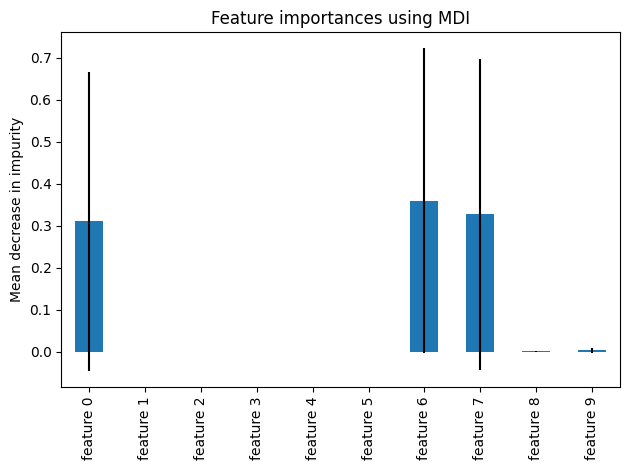

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [11]:
df['Price_Retail_Log'] = np.log1p(df['PRICE_RETAIL'])
df['Price_Current_Log'] = np.log1p(df['PRICE_CURRENT'])
df['Product_Length'] = df['PRODUCT_NAME'].apply(lambda x: len(x))
df['IsHighPrice'] = (df['PRICE_RETAIL'] > df['PRICE_RETAIL'].median()).astype(int)

np.random.seed(42)
df['PRICE_CURRENT'] = df['PRICE_CURRENT'] + np.random.normal(0, 0.1, df.shape[0])

# Define features and target variable
features = ['PRICE_RETAIL', 'IsWinter', 'IsSummer', 'IsIceCream', 'Price_Change', 'Days_Since_Last_Price_Update',
             'Price_Retail_Log', 'Price_Current_Log', 'Product_Length', 'IsHighPrice']
X = df[features]
y = df['PRICE_CURRENT']





In [18]:
models = {
    #'Ridge Regression': Ridge(alpha=1.0),
    #'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=52)
}

# Function to evaluate and print model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    mse, r2 = evaluate_model(model, X_test, y_test)
    print(f"{name} - Mean Squared Error: {mse:.4f}")
    print(f"{name} - R^2 Score: {r2:.4f}")
    print("-----")

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} - Cross-validated MSE: {-scores.mean():.4f}")

# Hyperparameter tuning for Random Forest Regressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=52),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Print best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (Negative MSE): {grid_search.best_score_:.4f}")

# Convert the best score to positive MSE
best_score_mse = -grid_search.best_score_
print(f"Best Score (Positive MSE): {best_score_mse:.4f}")

# Feature selection based on Random Forest Regressor
selector = SelectFromModel(grid_search.best_estimator_, threshold='mean')
selector.fit(X_train, y_train)
selected_features = X.columns[selector.get_support()]

print("Selected Features:", selected_features)

# Prepare the DataFrame with selected features for prediction
X_selected = df[selected_features]

# Reindex X_selected to ensure all columns used in training are present
X_selected = X_selected.reindex(columns=features, fill_value=0)
best_model = grid_search.best_estimator_
df['Predicted_Price'] = best_model.predict(X_selected)
def adjust_price(row):
    if row['IsWinter'] and row['IsIceCream']:
        return row['Predicted_Price'] * 0.8  # 20% discount
    elif row['IsSummer'] and row['IsIceCream']:
        return row['Predicted_Price'] * 1.3  # 30% increase
    return row['Predicted_Price']

df['Adjusted_Price'] = df.apply(adjust_price, axis=1)


Random Forest Regressor - Mean Squared Error: 0.0101
Random Forest Regressor - R^2 Score: 0.9957
-----
Random Forest Regressor - Cross-validated MSE: 0.0001
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Best Score (Negative MSE): -0.0102
Best Score (Positive MSE): 0.0102
Selected Features: Index(['PRICE_RETAIL', 'Price_Retail_Log', 'Price_Current_Log'], dtype='object')


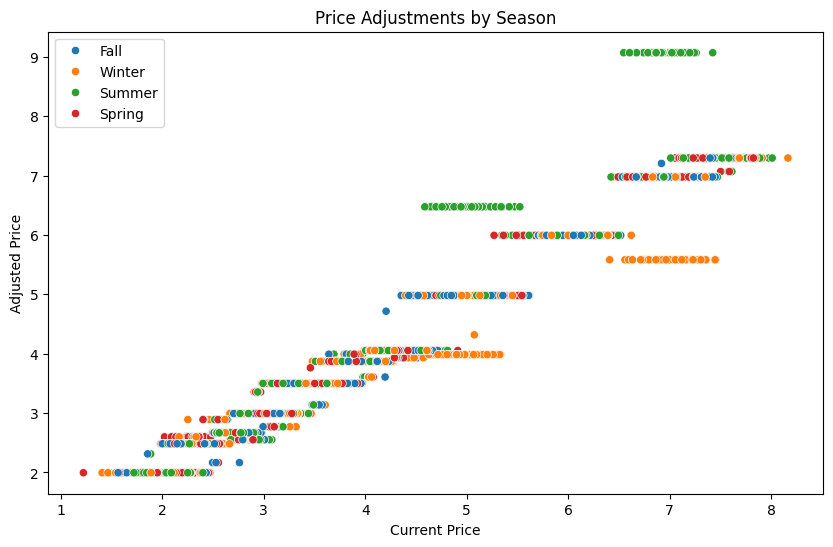

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# adjustments by seasons
forest_importances = pd.Series(importances, index=feature_names)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PRICE_CURRENT', y='Adjusted_Price', hue='Season', data=df)
plt.title('Price Adjustments by Season')
plt.xlabel('Current Price')
plt.ylabel('Adjusted Price')
plt.legend()
plt.show()

In [32]:
import numpy as np

# Calculate demand_multiplier based on percentile for high and low demand
high_demand_percentile = 75
low_demand_percentile = 25
if 'Price_Change' in df.columns:
  df['IsWinter'] = np.where(df['Predicted_Price'] > np.percentile(df['Predicted_Price'], high_demand_percentile),
                                     df['Predicted_Price'] / np.percentile(df['Predicted_Price'], high_demand_percentile),
                                     df['Predicted_Price'] / np.percentile(df['Predicted_Price'], low_demand_percentile))
else:
  print(df.columns)
  print("Column 'Number_of_orders' not found in the DataFrame. Please check your data.")

# Calculate supply_multiplier based on percentile for high and low supply
high_supply_percentile = 75
low_supply_percentile = 25

if 'Price_Change' in df.columns:
  df['IsSummer'] : np.where(df['Adjusted_Price'] > np.percentile(df['Adjusted_Price'], low_supply_percentile),
                                     np.percentile(df['Adjusted_Price'], high_supply_percentile) / df['Adjusted_Price'],
                                     np.percentile(df['Adjusted_Price'], low_supply_percentile) / df['Adjusted_Price'])
else:
  print("Column 'Number_of_Units' not found in the DataFrame. Please check your data.")


# Define price adjustment factors for high and low demand/supply
demand_threshold_high = 1.2  # Higher demand threshold
demand_threshold_low = 0.8  # Lower demand threshold
supply_threshold_high = 0.8  # Higher supply threshold
supply_threshold_low = 1.2  # Lower supply threshold

if 'Price_Change' in df.columns and 'IsWinter' in df.columns and 'IsSummer' in df.columns:
  # Calculate adjusted_ride_cost for dynamic pricing
  df['adjusted_cost'] = df['Price_Change'] * (
    np.maximum(df['IsSummer'], demand_threshold_low) *
    np.maximum(df['IsWinter'], supply_threshold_high)
  )
else:
  print("One or more of the required columns ('Historical_Cost', 'demand_multiplier', 'supply_multiplier') are not found. Please check your data.")



In [45]:
# Calculate the profit percentage for each ride
data = df.copy()
data['profit_percentage'] = ((data['IsSummer'] - data['IsWinter']) / data['Price_Change']) * 100
# Identify profitable rides where profit percentage is positive
profitable_rides = data[data['profit_percentage'] > 0]

# Identify loss rides where profit percentage is negative
loss_rides = data[data['profit_percentage'] < 0]


import plotly.graph_objects as go

# Calculate the count of profitable and loss rides
profitable_count = len(profitable_rides)
loss_count = len(loss_rides)
# Create a donut chart to show the distribution of profitable and loss rides
labels = ['Historical Priceing', 'Dynamic Priceing']
values = [profitable_count, loss_count]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.update_layout(title='Profitability of Icecrem (Dynamic Pricing vs. Historical Pricing)')
fig.show()